In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv("../datasets/full_data.csv")
df.head()


,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [12]:
approved_columns = [
    "P_MASS", "P_RADIUS", "P_DENSITY", "P_GRAVITY", "P_ESCAPE", "P_TYPE",
    "P_PERIOD", "P_SEMI_MAJOR_AXIS", "P_ECCENTRICITY", "P_INCLINATION",
    "P_OMEGA", "P_PERIASTRON", "P_APASTRON", "P_IMPACT_PARAMETER", "P_HILL_SPHERE",
    "S_MASS", "S_RADIUS", "S_LUMINOSITY", "S_TEMPERATURE", "S_AGE",
    "S_METALLICITY", "S_LOG_G", "S_TYPE", "S_MAG", "S_DISC", "S_MAGNETIC_FIELD",
    "S_SNOW_LINE", "S_TIDAL_LOCK", "P_DETECTION", "P_DISTANCE"
]

df_30 = df[approved_columns]
df_30.head()


,P_MASS,P_RADIUS,P_DENSITY,P_GRAVITY,P_ESCAPE,P_TYPE,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,P_INCLINATION,...,S_METALLICITY,S_LOG_G,S_TYPE,S_MAG,S_DISC,S_MAGNETIC_FIELD,S_SNOW_LINE,S_TIDAL_LOCK,P_DETECTION,P_DISTANCE
0,6165.86330,NaN,NaN,NaN,NaN,Jovian,326.03000,1.29,0.231,NaN,...,-0.35,2.31,K0 III,4.740,NaN,NaN,34.529063,0.642400,Radial Velocity,1.324418
1,4684.78480,NaN,NaN,NaN,NaN,Jovian,516.21997,1.53,0.080,NaN,...,-0.02,1.93,K4 III,5.016,NaN,NaN,42.732816,0.648683,Radial Velocity,1.534896
2,1525.57440,NaN,NaN,NaN,NaN,Jovian,185.84000,0.83,0.000,NaN,...,-0.24,2.63,G8 III,5.227,NaN,NaN,20.593611,0.600010,Radial Velocity,0.830000
3,1481.07850,NaN,NaN,NaN,NaN,Jovian,1773.40000,2.93,0.370,NaN,...,0.41,4.45,K0 V,6.610,NaN,NaN,2.141648,0.445415,Radial Velocity,3.130558
4,565.73385,NaN,NaN,NaN,NaN,Jovian,798.50000,1.66,0.680,NaN,...,0.06,4.36,G2.5 V,6.250,NaN,NaN,3.019411,0.473325,Radial Velocity,2.043792


In [13]:
missing_count = df_30.isnull().sum()
missing_percent = (missing_count / len(df_30)) * 100

missing_summary = pd.DataFrame({
    "Missing_Count": missing_count,
    "Missing_Percentage (%)": missing_percent
}).sort_values(by="Missing_Percentage (%)", ascending=False)

missing_summary


,Missing_Count,Missing_Percentage (%)
S_MAGNETIC_FIELD,4048,100.000000
S_DISC,4048,100.000000
P_ESCAPE,3342,82.559289
P_DENSITY,3342,82.559289
P_GRAVITY,3342,82.559289
P_OMEGA,3302,81.571146
P_INCLINATION,3204,79.150198
S_TYPE,2678,66.156126
P_ECCENTRICITY,2668,65.909091
P_IMPACT_PARAMETER,2639,65.192688


## Missing Data Summary

The table above shows:
- Total missing values per feature
- Percentage of missing data relative to the dataset size

Observations:
- Several orbital and stellar properties have a high proportion of missing values
- Core physical parameters like mass and radius are relatively more complete


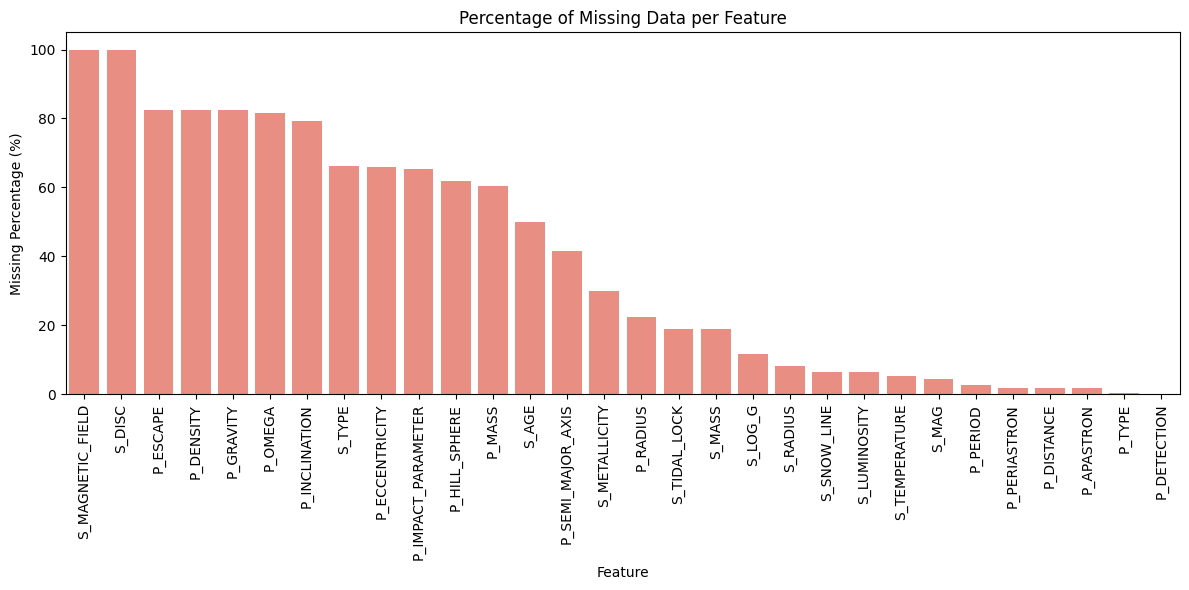

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=missing_summary.index,
    y=missing_summary["Missing_Percentage (%)"],
    color="salmon"
)
plt.xticks(rotation=90)
plt.title("Percentage of Missing Data per Feature")
plt.ylabel("Missing Percentage (%)")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


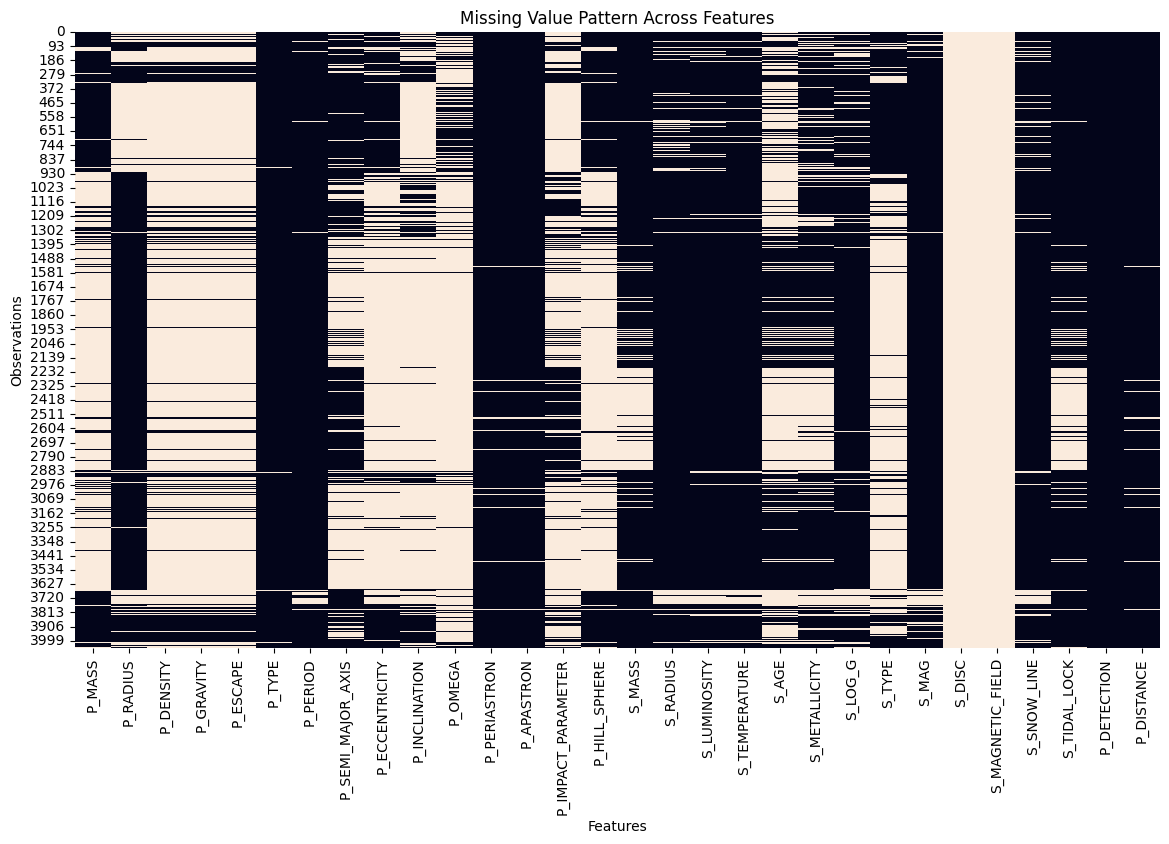

In [15]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_30.isnull(), cbar=False)
plt.title("Missing Value Pattern Across Features")
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()


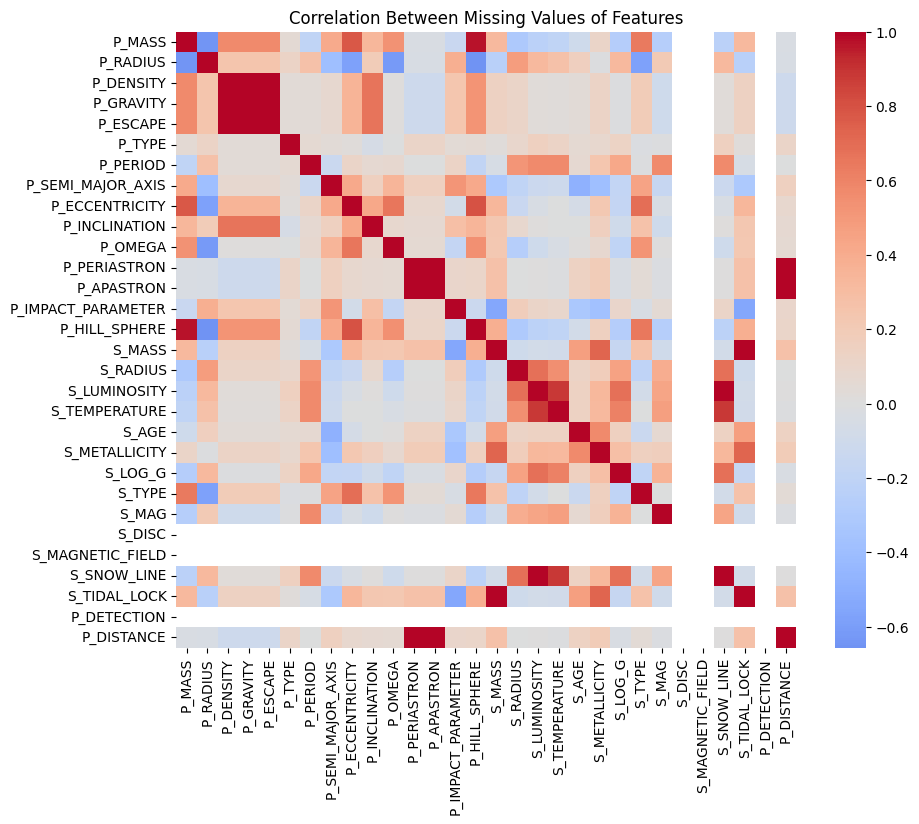

In [16]:
missing_corr = df_30.isnull().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(missing_corr, cmap="coolwarm", center=0)
plt.title("Correlation Between Missing Values of Features")
plt.show()


## Conclusion

- Missing data is unevenly distributed across the selected 30 features
- Orbital and stellar metadata tend to have higher missingness
- Certain features show correlated missing patterns, indicating shared data sources
- This analysis will guide informed data cleaning and feature selection in later stages
